<a href="https://colab.research.google.com/github/user202101/temp/blob/main/SEOUL_STTREE_TEST(%EC%88%98%EC%A0%95).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from scipy import stats

from matplotlib import font_manager, rc 
rc('font', family='HCR Dotum')

In [ ]:
path = '/content/sample_data/Seoul_STTREE.csv'
sttree = pd.read_csv(path)
sttree.head()

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data_file = '/content/drive/MyDrive/빅데이터 아카데미/워크샵 자료/Seoul_STTREE.csv'
sttree = pd.read_csv(data_file)
sttree.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (2,6,7,9,13,14,16,18,19,21,26,30,32,40) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,OBJECTID,GU_NM,HNR_NAM,MTC_AT,MASTERNO,SLAVENO,NEADRES_NM,TRE_SOM,THT_HG,RM,MGE_LVL,LC,EVMT_IFNE,PLT_DE,RPRUNG_CN,ROAD_LT,ETC,GU_NO,DONG_NM,ETRC_YNO,SN,RPLNT_CN,ITM_ERY,BHT_DM,RNK_LC_CN,WTRTB_BT,EXT_YNO,MGE_ORG,DME_ETT,CMFE_LU_ST,DSPRVN_CN,MGE_MTE,MNCXPN_CT,TRE_IDN,TFCLNE_CO,PTN_CVR,WIDTH_NM,VAL_LVL,RNK_BHT_HG,WDPT_NM,CREAT_DE,PO_FE_NM,xcoord,ycoord
0,1,중구,NaN,NaN,NaN,NaN,NaN,8,5.0,NaN,2,광희초등학교,0.0,NaN,NaN,0,NaN,2.0,NaN,2,306,NaN,8,18.0,12.0,3,0,공원녹지과,0,0.0,2010. 진딧물 방제,0,NaN,2-다산로-가-0312,0,1,다산로,0,3,느티나무,NaN,NaN,201413.8048,451774.5297
1,2,중구,NaN,NaN,NaN,NaN,NaN,4,3.5,NaN,2,NaN,0.0,2006.04,NaN,1150,NaN,2.0,NaN,2,1,NaN,8,12.0,9.0,3,0,공원녹지과,0,0.0,NaN,0,NaN,2-돈화문로-가-00051,0,1,돈화문로,0,6,이팝나무,NaN,NaN,199369.4228,451738.6932
2,3,중구,NaN,NaN,NaN,NaN,NaN,4,3.5,NaN,2,NaN,0.0,2006.04,NaN,1150,NaN,2.0,NaN,2,1,NaN,8,12.0,9.0,3,0,공원녹지과,0,0.0,NaN,0,NaN,2-돈화문로-가-00077,0,1,돈화문로,0,6,이팝나무,NaN,NaN,199340.3443,452056.3631
3,4,중구,NaN,NaN,NaN,NaN,NaN,8,8.0,NaN,1,삼각동,0.0,4,NaN,0,NaN,2.0,NaN,2,149,NaN,8,15.0,12.0,6,0,공원녹지과,2,0.0,2010. 진딧물 및 흰불나방 등 지상방제,0,NaN,2-청계천로-가-0152,0,1,청계천로,0,6,회화나무,NaN,NaN,198644.2199,452093.7103
4,5,중구,NaN,NaN,NaN,NaN,NaN,8,10.0,NaN,1,신한은행,0.0,2007.03,NaN,0,NaN,2.0,NaN,2,400,NaN,8,25.0,12.0,5,0,공원녹지과,0,0.0,2010. 흡즙성및천공성 해충종합방제,0,7.03,2-태평로-가-0400,0,1,태평로,0,6,소나무,NaN,NaN,197773.0658,451247.1363


In [ ]:
sttree.describe()

,OBJECTID,MTC_AT,MASTERNO,SLAVENO,THT_HG,MGE_LVL,EVMT_IFNE,ROAD_LT,GU_NO,SN,ITM_ERY,BHT_DM,RNK_LC_CN,WTRTB_BT,DME_ETT,CMFE_LU_ST,MGE_MTE,TFCLNE_CO,PTN_CVR,VAL_LVL,RNK_BHT_HG,PO_FE_NM,xcoord,ycoord
count,257235.000000,1290.000000,726.000000,684.000000,257235.000000,257235.000000,257235.000000,257235.000000,255360.000000,2.572350e+05,257235.000000,257235.000000,254425.000000,257235.000000,257235.000000,254833.000000,257235.000000,257235.0,257235.000000,257235.000000,257235.000000,0.0,2.572350e+05,2.572350e+05
mean,128618.000000,1.009302,970.746556,26.055556,8.217280,3.649395,0.039925,335.427547,15.422650,2.570114e+02,6.018835,20.676558,6.169822,4.140047,1.067273,0.419855,0.034019,0.0,1.266756,0.257469,4.391712,NaN,-inf,-inf
std,74257.492585,0.096036,526.498593,41.710989,5.705265,6.799457,1.025994,1069.584280,7.047059,2.084659e+03,1.958172,11.136018,4.751419,2.154744,1.325235,1.723590,0.181430,0.0,0.489653,1.084099,2.479662,NaN,NaN,NaN
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.0,0.000000,0.000000,0.000000,NaN,-inf,-inf
25%,64309.500000,1.000000,720.000000,5.000000,6.000000,2.000000,0.000000,0.000000,10.000000,3.600000e+01,6.000000,14.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.0,1.000000,0.000000,3.000000,NaN,1.926987e+05,4.449685e+05
50%,128618.000000,1.000000,859.000000,10.000000,8.000000,2.000000,0.000000,0.000000,16.000000,1.440000e+02,6.000000,20.000000,6.000000,4.000000,1.000000,0.000000,0.000000,0.0,1.000000,0.000000,3.000000,NaN,2.017600e+05,4.489464e+05
75%,192926.500000,1.000000,1703.000000,29.000000,10.000000,2.000000,0.000000,0.000000,22.000000,3.540000e+02,8.000000,27.000000,12.000000,5.000000,2.000000,0.000000,0.000000,0.0,2.000000,0.000000,6.000000,NaN,2.062695e+05,4.529678e+05
max,257235.000000,2.000000,1733.000000,407.000000,1911.000000,40.000000,510.000000,16500.000000,214.000000,1.046000e+06,9.000000,2326.000000,12.000000,70.000000,23.000000,510.000000,4.000000,0.0,11.000000,9.000000,15.000000,NaN,2.157960e+05,4.659020e+05


In [4]:
unic = sttree.nunique()
table = sttree.isna().sum() / sttree.shape[0]
ntable = sttree.isna().sum()

pd.concat([ntable, table, unic], axis=1, keys=['NaN개수','NaN비율','Unic개수'])

# table.reset_index()

,NaN개수,NaN비율,Unic개수
OBJECTID,0,0.000000,257235
GU_NM,0,0.000000,24
HNR_NAM,249246,0.968943,29
MTC_AT,255945,0.994985,2
MASTERNO,256509,0.997178,75
SLAVENO,256551,0.997341,52
NEADRES_NM,257226,0.999965,7
TRE_SOM,2513,0.009769,11
THT_HG,0,0.000000,74
RM,257207,0.999891,9


In [ ]:
print(sttree.shape)
col1=['GU_NM', 'HNR_NAM', 'MTC_AT', 'TRE_SOM', 'THT_HG', 'MGE_LVL', 'RPRUNG_CN', 'ETC', 'ETRC_YNO', 'ITM_ERY', 'RNK_LC_CN', 'EXT_YNO', 'DME_ETT', 'MGE_MTE']

for i in col1:
    print(i + " :")
    print(sttree[i].unique())

(47227, 44)
GU_NM :
['중구' '용산구' '성동구' '광진구' '동대문구' '중랑구' '성북구']
HNR_NAM :
[nan '유료주차장' '0' '용두동' '망우동']
MTC_AT :
[nan  1.]
TRE_SOM :
[8.0 4.0 6.0 0.0 nan 1.0 2.0 '8' '4' '0' '은행나무']
THT_HG :
[  5.    3.5   8.   10.    7.   24.   25.   12.   15.   30.   16.   14.
  28.    9.   13.   20.   18.    6.   32.   11.   22.   17.   27.   19.
  35.   23.    4.   26.   21.    3.   29.    2.    0.   31.   40.   37.
  33.   38.    2.5   5.5   1.   89.   99.   66.   34.   69.    4.5 125. ]
MGE_LVL :
[ 2  1  3  0 29 31 25 34 30 32 35 26 28 33 22 23 40 20 27 21 19 37 36 24
 38  4]
RPRUNG_CN :
[nan 0.0 218.0 204.0 220.0 219.0 223.0 212.0 224.0 216.0 213.0 209.0
 '0224한전' '0309직영' '0310한전' '0112한전' '0320도급' '080131 080203' '80215'
 '080305 080308' '080219 080222' '080306 080307' '80321' '80228'
 '080308 080309' '080204 080207' '80310' '080304 080306' '080326 080327'
 '080214 080215' '080303 080304' '080128 080129' '080211 080212'
 '080220 080221' '080301 080303' '080216 080218' '080225 080227'
 '080126 

In [ ]:
sttree['GU_NM'].value_counts().reset_index()

,index,GU_NM
0,송파구,21515
1,강남구,21164
2,강동구,16731
3,서초구,16585
4,영등포구,16420
5,노원구,14191
6,강서구,13784
7,마포구,12150
8,양천구,12008
9,동대문구,9701


In [ ]:
import matplotlib
matplotlib.font_manager._rebuild()

rc('font', family='HCR Dotum')

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51473 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50857 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49328 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46041 missing from current font.
  font.set_

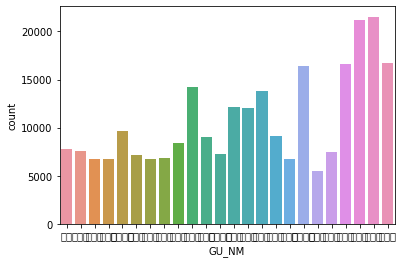

In [ ]:
sns.countplot(x='GU_NM', data=sttree)
plt.show()

In [ ]:
sttree.describe()

,OBJECTID,MTC_AT,MASTERNO,SLAVENO,THT_HG,RM,MGE_LVL,EVMT_IFNE,ROAD_LT,GU_NO,ETRC_YNO,SN,RPLNT_CN,ITM_ERY,BHT_DM,RNK_LC_CN,WTRTB_BT,DME_ETT,CMFE_LU_ST,MGE_MTE,MNCXPN_CT,TFCLNE_CO,PTN_CVR,VAL_LVL,RNK_BHT_HG,PO_FE_NM,xcoord,ycoord
count,47227.000000,9.0,2.000000,2.0,47227.000000,1.0,47227.000000,47226.000000,47226.000000,47163.000000,47169.000000,47226.000000,53.000000,47226.000000,47226.000000,47012.000000,47226.000000,47226.000000,47119.000000,47226.0,1815.000000,47226.0,47226.000000,47226.000000,47226.000000,0.0,4.722600e+04,4.722600e+04
mean,23614.000000,1.0,13.000000,18.0,8.455121,0.0,5.936096,0.011013,375.239275,4.661875,1.411351,154.597997,1896.050943,6.028184,23.340924,6.520442,4.407445,1.634058,0.011015,0.0,577.447686,0.0,1.153305,0.003049,5.480922,NaN,-inf,-inf
std,13633.404918,0.0,1.414214,0.0,3.704922,NaN,9.884812,2.347047,993.863858,1.813824,0.543159,160.837835,466.642454,1.763734,9.948385,4.703652,2.241124,2.435574,2.349603,0.0,744.593231,0.0,0.396920,0.079111,2.640281,NaN,NaN,NaN
min,1.000000,1.0,12.000000,18.0,0.000000,0.0,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,9.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,NaN,-inf,-inf
25%,11807.500000,1.0,12.500000,18.0,7.000000,0.0,2.000000,0.000000,0.000000,3.000000,1.000000,21.000000,2009.050000,6.000000,16.000000,0.000000,3.000000,1.000000,0.000000,0.0,7.120000,0.0,1.000000,0.000000,3.000000,NaN,2.001623e+05,4.496280e+05
50%,23614.000000,1.0,13.000000,18.0,8.000000,0.0,2.000000,0.000000,0.000000,5.000000,1.000000,106.000000,2009.050000,6.000000,23.000000,9.000000,4.000000,1.000000,0.000000,0.0,8.120000,0.0,1.000000,0.000000,6.000000,NaN,2.039746e+05,4.515732e+05
75%,35420.500000,1.0,13.500000,18.0,10.000000,0.0,3.000000,0.000000,0.000000,6.000000,2.000000,241.000000,2009.900000,8.000000,30.000000,9.000000,5.000000,2.000000,0.000000,0.0,729.000000,0.0,1.000000,0.000000,6.000000,NaN,2.067005e+05,4.536218e+05
max,47227.000000,1.0,14.000000,18.0,125.000000,0.0,40.000000,510.000000,16500.000000,8.000000,2.000000,3677.000000,2009.900000,9.000000,333.000000,12.000000,33.000000,23.000000,510.000000,0.0,2010.500000,0.0,2.000000,4.000000,15.000000,NaN,2.102163e+05,4.582582e+05


In [ ]:
path = '/content/sample_data/pollution_2021.csv'
pol = pd.read_csv(path)
print(pol.shape)
a = pol.groupby('측정소명', as_index=False).mean()
a.iloc[:,[0,2,3,4,5,6,7]].head()

(18300, 8)


,측정소명,이산화질소농도(ppm),오존농도(ppm),일산화탄소농도(ppm),아황산가스(ppm),미세먼지(㎍/㎥),초미세먼지(㎍/㎥)
0,강남구,0.023749,0.027380,0.463115,0.003426,36.546448,20.672131
1,강남대로,0.031822,0.020123,0.687945,0.003116,39.972603,19.378082
2,강동구,0.022352,0.025385,0.418033,0.002544,39.937158,21.669399
3,강변북로,0.030011,0.021967,0.562568,0.003333,39.010929,21.265027
4,강북구,0.016265,0.028495,0.406284,0.002691,39.928962,19.456284


In [ ]:
pol['측정일시'] = pol['측정일시'].astype('str')
pol['측정일시']=pd.to_datetime(pol['측정일시'])
pol.head()

,측정일시,측정소명,이산화질소농도(ppm),오존농도(ppm),일산화탄소농도(ppm),아황산가스(ppm),미세먼지(㎍/㎥),초미세먼지(㎍/㎥)
0,2021-10-22,강남구,0.040,0.002,0.5,0.003,37.0,23.0
1,2021-10-22,강남대로,0.032,0.006,0.7,0.004,38.0,21.0
2,2021-10-22,강동구,0.035,0.003,0.5,0.003,39.0,24.0
3,2021-10-22,강변북로,0.040,0.003,0.5,0.003,39.0,26.0
4,2021-10-22,강북구,0.019,0.016,0.4,0.002,33.0,18.0


In [ ]:
pol['month'] = pol['측정일시'].dt.month
pol.head()

,측정일시,측정소명,이산화질소농도(ppm),오존농도(ppm),일산화탄소농도(ppm),아황산가스(ppm),미세먼지(㎍/㎥),초미세먼지(㎍/㎥),month
0,2021-10-22,강남구,0.040,0.002,0.5,0.003,37.0,23.0,10
1,2021-10-22,강남대로,0.032,0.006,0.7,0.004,38.0,21.0,10
2,2021-10-22,강동구,0.035,0.003,0.5,0.003,39.0,24.0,10
3,2021-10-22,강변북로,0.040,0.003,0.5,0.003,39.0,26.0,10
4,2021-10-22,강북구,0.019,0.016,0.4,0.002,33.0,18.0,10


In [ ]:
plt.figure(figsize=(20,5))
#plt.plot(pol['측정일시'].dt.month, pol['이산화질소농도(ppm)'], label='a')
sns.lineplot('month', '이산화질소농도(ppm)', hue='측정소명', data=pol)
plt.show

In [ ]:
pol.loc[pol['측정소명']=='강남구', ['이산화질소농도(ppm)']]

,이산화질소농도(ppm)
0,0.040
50,0.031
100,0.027
150,0.022
200,0.025
...,...
18050,0.037
18100,0.030
18150,0.016
18200,0.013
